In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd

%matplotlib inline

In [19]:
df_global = pd.read_excel(r'C:\Users\mrosk\OneDrive\Desktop\Mental-Health-in-Tech\Subsets\global_subset.xlsx')

In [20]:
df_global.drop(df_global.columns[0], axis=1, inplace =True)
df_global.head() 

,family_history_mental_illness,had_mental_health_disorder_past,diagnosed_by_professional,sought_mental_health_treatment,interference_with_work_when_treated,interference_with_work_when_not_treated,currently_has_mental_health_disorder,y__dissociative,y_eating,y_no_diagnosis,...,hr_rep,one_person_shop,other_job_description,sales_rep,supervisor_team_lead,support_rep,is_self_employed,willing_discuss_mental_health_in_interview,willing_discuss_physical_health_in_interview,has_previous_employers
0,No,Yes,Yes,0,Not applicable to me,Not applicable to me,No,0,0,1,...,0,0,0,0,0,0,0,Maybe,Maybe,1
1,Yes,Yes,Yes,1,Rarely,Sometimes,Yes,0,0,0,...,0,0,0,0,0,0,0,No,Maybe,1
2,No,Maybe,No,1,Not applicable to me,Not applicable to me,No,0,0,1,...,0,0,0,0,0,0,0,Yes,Yes,1
3,No,Yes,Yes,1,Sometimes,Sometimes,Yes,0,0,0,...,0,0,0,0,1,0,1,Maybe,Yes,1
4,Yes,Yes,Yes,1,Sometimes,Sometimes,Yes,0,0,0,...,0,0,0,0,1,1,0,No,Maybe,1


In [21]:
#Set Seaborn Style
sns.set(style ='whitegrid')
#sns.set_context('talk')

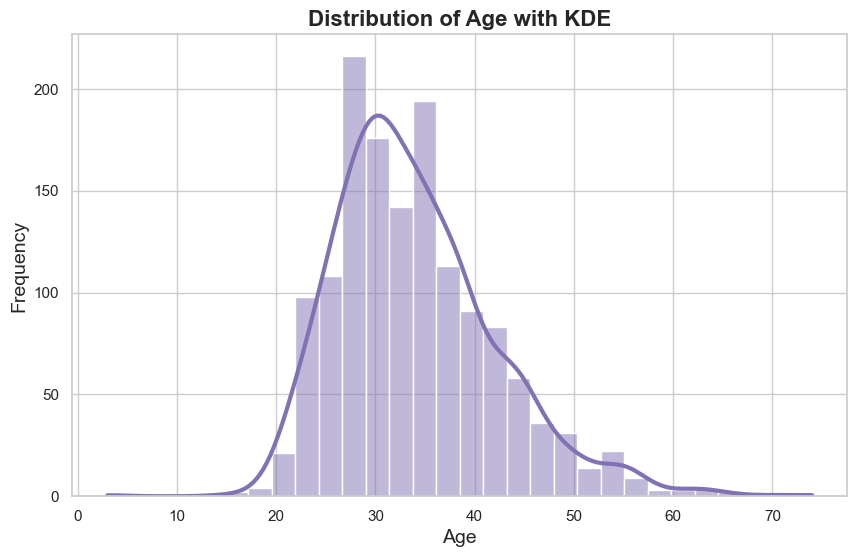

In [22]:
plt.figure(figsize=(10,6))
ax = sns.histplot(df_global['age'], kde=True, color ='m', bins=30, line_kws={'linewidth' : 3})

ax.set_title('Distribution of Age with KDE', fontsize =16, fontweight='bold')
ax.set_xlabel('Age', fontsize = 14)
ax.set_ylabel('Frequency', fontsize=14)

plt.show()


C:\Users\mrosk\AppData\Local\Temp\ipykernel_8780\4016130942.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='gender',data=df_global, palette=palette)


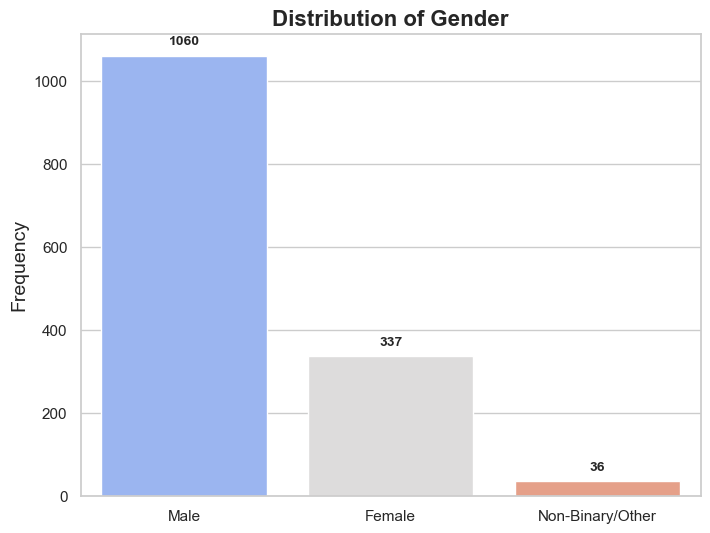

In [23]:
palette= sns.color_palette('coolwarm', n_colors=len(df_global['gender'].unique()))

plt.figure(figsize = (8,6))
ax = sns.countplot(x='gender',data=df_global, palette=palette)

ax.set_title('Distribution of Gender', fontsize=16, fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('Frequency', fontsize=14)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
    (p.get_x() +p.get_width() / 2. , height),
    ha = 'center', va='center', xytext =(0,10), textcoords= 'offset points',
    fontweight='bold', fontsize=10)

plt.show()

C:\Users\mrosk\AppData\Local\Temp\ipykernel_8780\809032735.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_global,x='num_employees',order = order, palette='viridis')


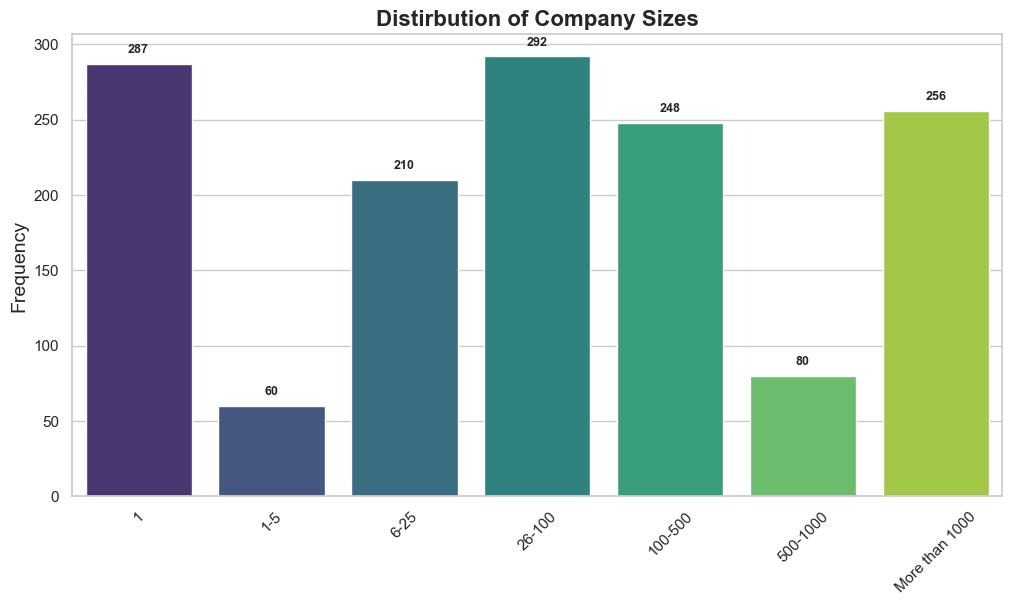

In [24]:
order = ['1', '1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df_global,x='num_employees',order = order, palette='viridis')


ax.set_title('Distirbution of Company Sizes', fontsize=16,fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('Frequency', fontsize=14)
ax.tick_params(axis='both', which='major') 
plt.xticks(rotation=45)  

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', 
                fontweight='bold', fontsize=9)

plt.show()

C:\Users\mrosk\AppData\Local\Temp\ipykernel_8780\3855903876.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=job_counts.values, y=job_counts.index, palette='viridis')


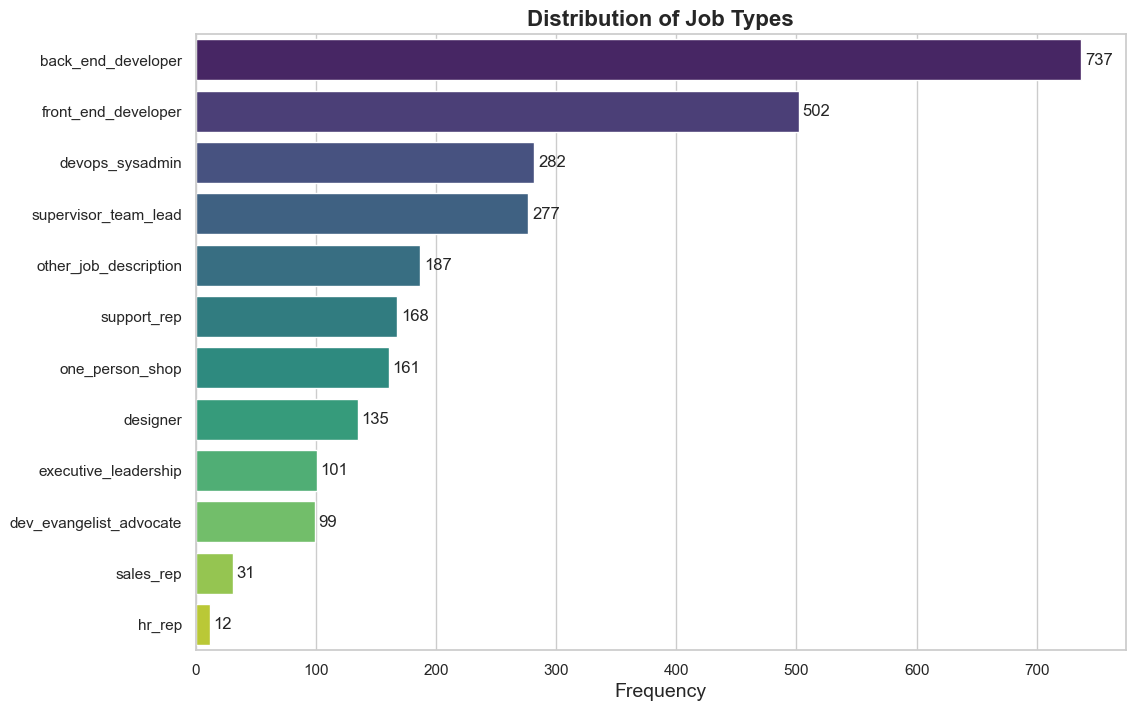

In [25]:
job_columns = [
    'back_end_developer', 'designer', 'dev_evangelist_advocate', 'devops_sysadmin',
    'executive_leadership', 'front_end_developer', 'hr_rep', 'one_person_shop',
    'other_job_description', 'sales_rep', 'supervisor_team_lead', 'support_rep'
]

job_counts = df_global[job_columns].sum().sort_values(ascending = False)

plt.figure(figsize=(12,8))
ax = sns.barplot(x=job_counts.values, y=job_counts.index, palette='viridis')

ax.set_title('Distribution of Job Types', fontsize =16, fontweight = 'bold')
ax.set_xlabel('Frequency', fontsize=14)
ax.set_ylabel('')

for p in ax.patches:
    width = p.get_width()
    plt.text(width + 3,
             p.get_y() + p.get_height()/2,
             '{:1.0f}'.format(width),
             va='center'
             )

plt.show()

C:\Users\mrosk\AppData\Local\Temp\ipykernel_8780\3967179578.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=disorder_df, x='Disorder Type', y='Frequency', palette='viridis')


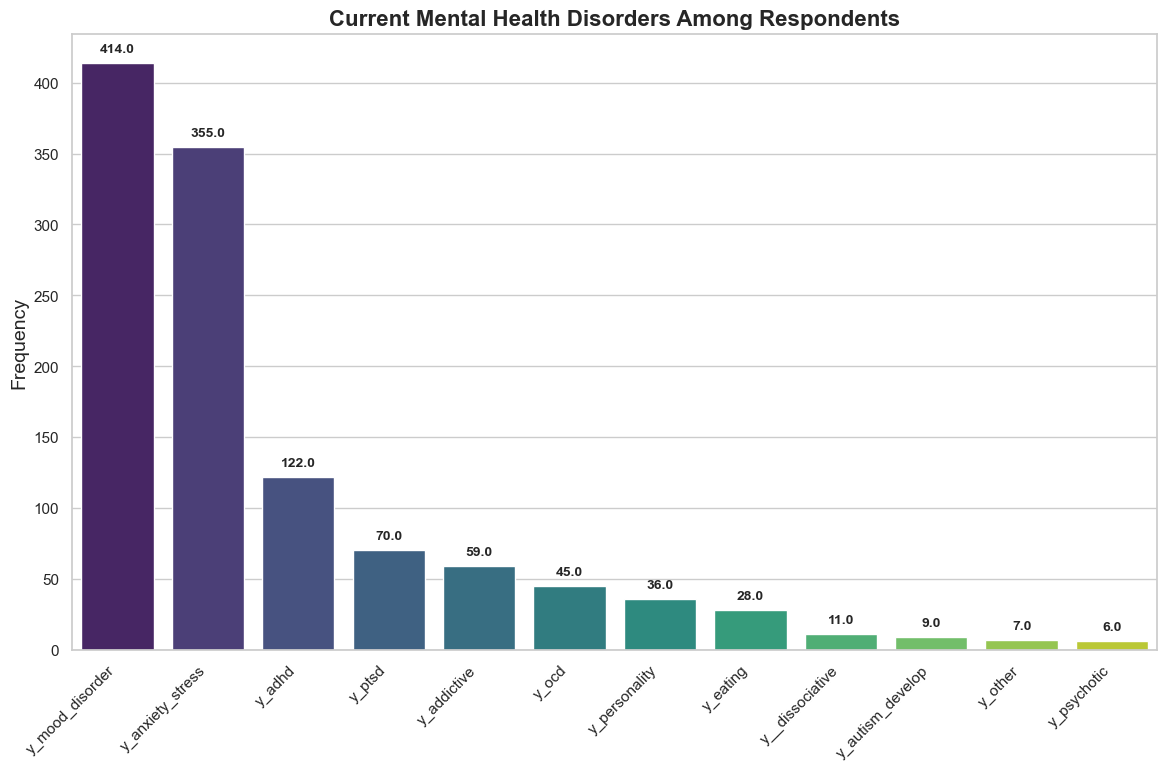

In [26]:
disorder_columns = [
    'y__dissociative', 'y_eating', 'y_ocd', 'y_psychotic',
    'y_addictive', 'y_anxiety_stress', 'y_mood_disorder', 'y_autism_develop',
    'y_other', 'y_ptsd', 'y_adhd', 'y_personality'
]

disorder_counts = df_global[disorder_columns].sum()

disorder_df = pd.DataFrame({'Disorder Type' : disorder_columns, 'Frequency' : disorder_counts})
disorder_df.sort_values(by='Frequency', ascending = False, inplace = True)

plt.figure(figsize=(14,8))
ax = sns.barplot(data=disorder_df, x='Disorder Type', y='Frequency', palette='viridis')
ax.set_title('Current Mental Health Disorders Among Respondents', fontsize=16, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=14)
ax.set_xlabel('')
plt.xticks(rotation= 45, ha='right')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() /2.,p.get_height()),
                ha='center', va='center',
                xytext = (0,10),
                textcoords = 'offset points', fontsize=10,fontweight='bold')

plt.show()

C:\Users\mrosk\AppData\Local\Temp\ipykernel_8780\1363814393.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=believed_disorder_df, x='Believed Disorder Type', y='Frequency', palette='viridis')


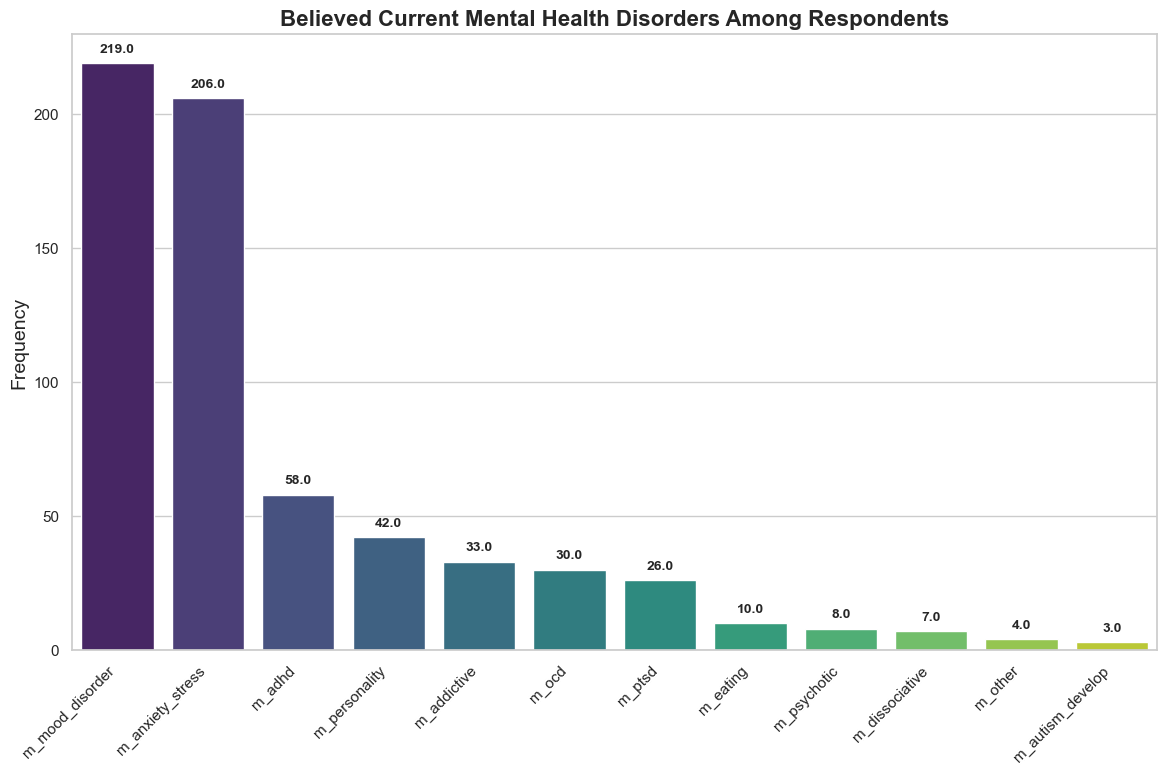

In [27]:
believed_disorder_columns = [
    'm_adhd', 'm_eating', 'm_mood_disorder', 'm_ocd', 'm_personality', 
    'm_ptsd', 'm_psychotic', 'm_addictive', 'm_anxiety_stress', 'm_autism_develop', 
    'm_other', 'm_dissociative'
]

believed_disorder_counts = df_global[believed_disorder_columns].sum()

believed_disorder_df = pd.DataFrame({'Believed Disorder Type' : believed_disorder_columns, 'Frequency' : believed_disorder_counts})
believed_disorder_df.sort_values(by='Frequency', ascending = False, inplace = True)

plt.figure(figsize=(14,8))
ax = sns.barplot(data=believed_disorder_df, x='Believed Disorder Type', y='Frequency', palette='viridis')
ax.set_title('Believed Current Mental Health Disorders Among Respondents', fontsize=16, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=14)
ax.set_xlabel('')
plt.xticks(rotation= 45, ha='right')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() /2.,p.get_height()),
                ha='center', va='center',
                xytext = (0,10),
                textcoords = 'offset points', fontsize=10,fontweight='bold')

plt.show()

C:\Users\mrosk\AppData\Local\Temp\ipykernel_8780\39802675.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='Disorder Type', x = 'Frequency', data = pro_disorder_df, palette='viridis')


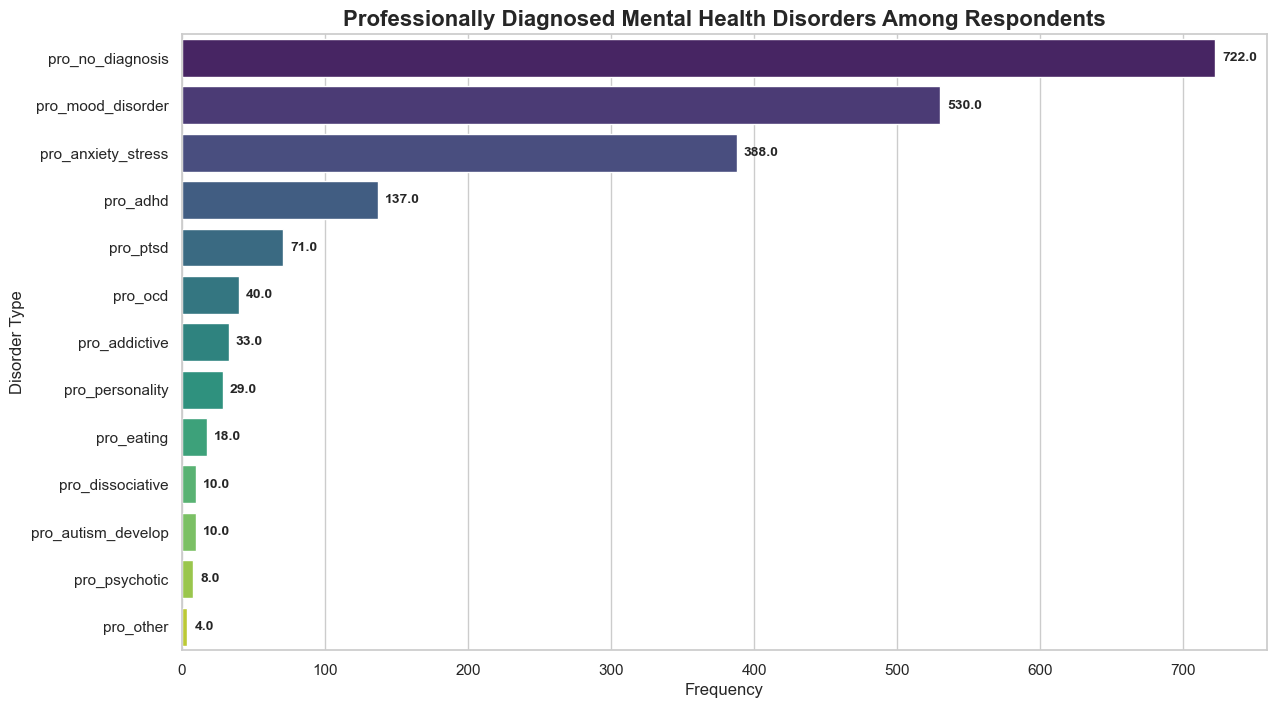

In [28]:
pro_disorder_columns = [
    'pro_dissociative', 'pro_eating', 'pro_no_diagnosis', 'pro_ocd', 'pro_psychotic',
    'pro_adhd', 'pro_addictive', 'pro_anxiety_stress', 'pro_autism_develop', 
    'pro_mood_disorder', 'pro_ptsd', 'pro_personality', 'pro_other'
]

pro_disorder_counts = df_global[pro_disorder_columns].sum()

pro_disorder_df = pd.DataFrame({'Disorder Type' : pro_disorder_columns, 'Frequency' : pro_disorder_counts})
pro_disorder_df.sort_values(by='Frequency', ascending = False,inplace = True)

plt.figure(figsize=(14,8))
ax = sns.barplot(y='Disorder Type', x = 'Frequency', data = pro_disorder_df, palette='viridis')

ax.set_title('Professionally Diagnosed Mental Health Disorders Among Respondents', fontsize = 16, fontweight = 'bold')


for p in ax.patches:
    ax.annotate(format(p.get_width(), '.1f'),  
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center',  
                xytext=(5, 0), 
                textcoords='offset points', fontsize=10, fontweight='bold')

plt.show()

In [29]:
alpha2_to_alpha3 = {
    'GB': 'GBR', 'US': 'USA', 'CA': 'CAN', 'DE': 'DEU', 'NL': 'NLD', 'CZ': 'CZE',
    'LT': 'LTU', 'AU': 'AUS', 'FR': 'FRA', 'VE': 'VEN', 'PL': 'POL', 'BE': 'BEL',
    'BR': 'BRA', 'DK': 'DNK', 'SE': 'SWE', 'RU': 'RUS', 'ES': 'ESP', 'IN': 'IND',
    'AE': 'ARE', 'MX': 'MEX', 'CH': 'CHE', 'NO': 'NOR', 'AR': 'ARG', 'IE': 'IRL',
    'IT': 'ITA', 'FI': 'FIN', 'TR': 'TUR', 'CO': 'COL', 'CR': 'CRI', 'VN': 'VNM',
    'BG': 'BGR', 'NZ': 'NZL', 'ZA': 'ZAF', 'SK': 'SVK', 'AT': 'AUT', 'BD': 'BGD',
    'PK': 'PAK', 'AF': 'AFG', 'GR': 'GRC', 'RO': 'ROU', 'BN': 'BRN', 'IR': 'IRN',
    'HU': 'HUN', 'IL': 'ISR', 'JP': 'JPN', 'EC': 'ECU', 'BA': 'BIH', 'CN': 'CHN',
    'CL': 'CHL', 'GT': 'GTM', 'RS': 'SRB', 'EE': 'EST'
}

df_global['country_of_work_alpha3'] = df_global['country_of_work'].map(alpha2_to_alpha3)
df_global['country_of_work_alpha3'].fillna('Unknown', inplace=True)


alpha2_to_alpha3 = {
    'GB': 'GBR', 'US': 'USA', 'CA': 'CAN', 'DE': 'DEU', 'NL': 'NLD', 'CZ': 'CZE',
    'LT': 'LTU', 'AU': 'AUS', 'FR': 'FRA', 'VE': 'VEN', 'PL': 'POL', 'BE': 'BEL',
    'BR': 'BRA', 'DK': 'DNK', 'SE': 'SWE', 'RU': 'RUS', 'ES': 'ESP', 'IN': 'IND',
    'MX': 'MEX', 'CH': 'CHE', 'NO': 'NOR', 'AR': 'ARG', 'IE': 'IRL', 'IT': 'ITA',
    'FI': 'FIN', 'CO': 'COL', 'CR': 'CRI', 'VN': 'VNM', 'BG': 'BGR', 'NZ': 'NZL',
    'ZA': 'ZAF', 'SK': 'SVK', 'AT': 'AUT', 'BD': 'BGD', 'DZ': 'DZA', 'PK': 'PAK',
    'AF': 'AFG', 'GR': 'GRC', 'RO': 'ROU', 'BN': 'BRN', 'JP': 'JPN', 'IR': 'IRN',
    'HU': 'HUN', 'IL': 'ISR', 'EC': 'ECU', 'BA': 'BIH', 'CN': 'CHN', 'CL': 'CHL',
    'GT': 'GTM', 'TW': 'TWN', 'RS': 'SRB', 'EE': 'EST'
}
df_global['country_of_residence_alpha3'] = df_global['country_of_residence'].map(alpha2_to_alpha3)
df_global['country_of_residence_alpha3'].fillna('Unknown', inplace=True)

C:\Users\mrosk\AppData\Local\Temp\ipykernel_8780\1532808896.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


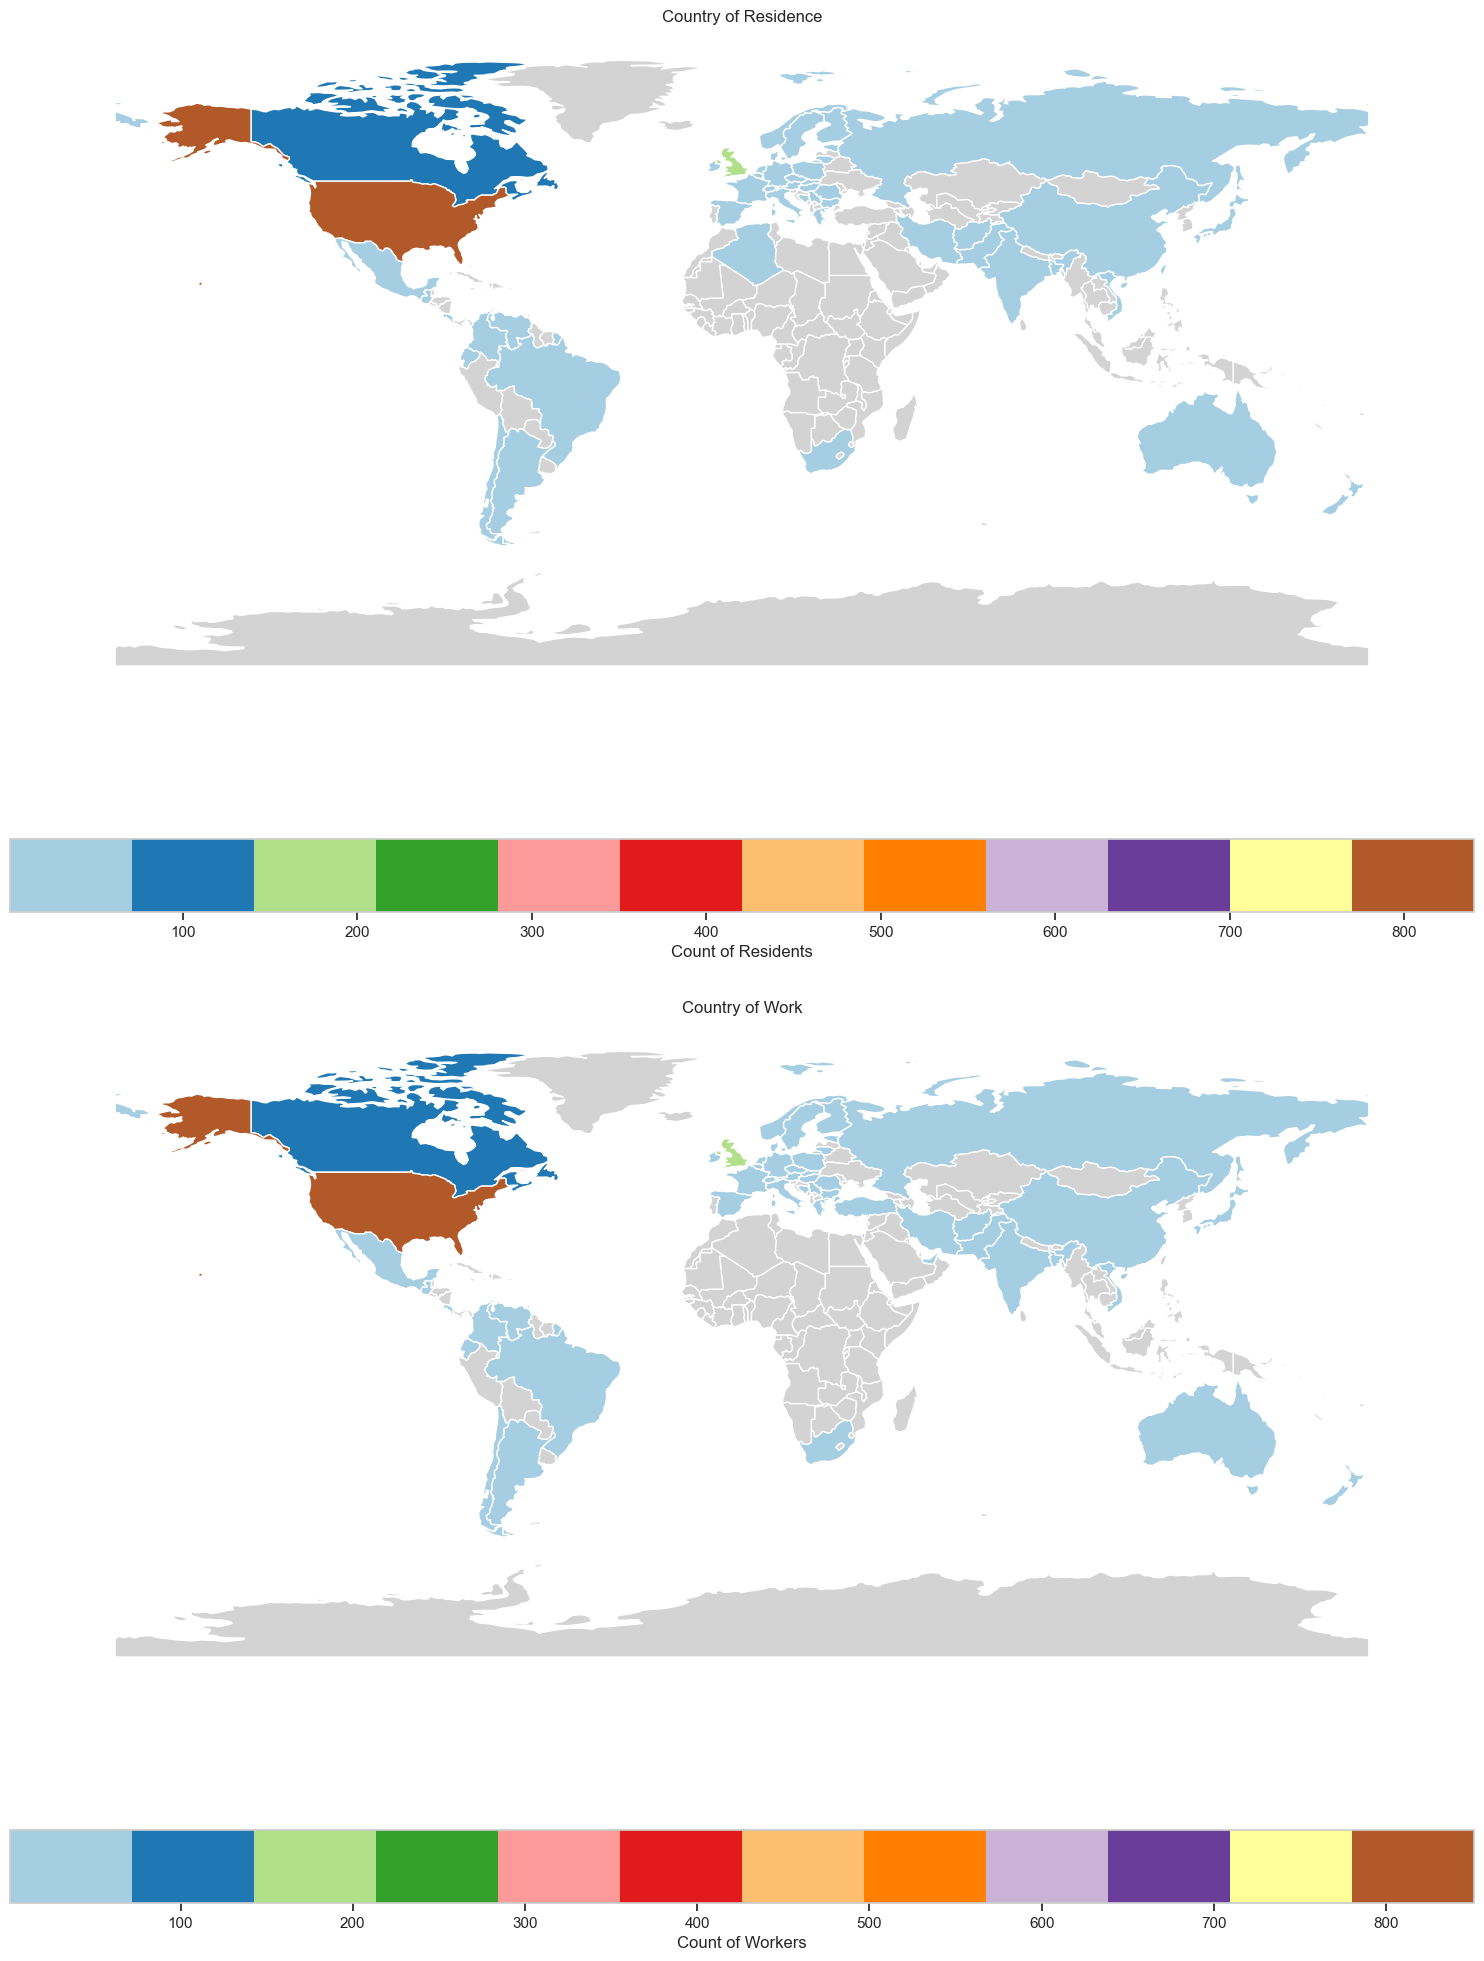

In [30]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[['iso_a3','geometry']]

residence_counts = df_global['country_of_residence_alpha3'].value_counts()
work_counts = df_global['country_of_work_alpha3'].value_counts()

world = world.merge(residence_counts.to_frame(name = 'residence_count'),left_on ='iso_a3', right_index = True, how='left')
world = world.merge(work_counts.to_frame(name='work_count'), left_on='iso_a3', right_index =True, how='left')

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 20), subplot_kw={'aspect': 'equal'})
axs.flatten()

world.plot(column = 'residence_count', ax =axs[0], legend = True,
            legend_kwds = {'label' :'Count of Residents', 'orientation': "horizontal"},
            cmap='Paired', missing_kwds={'color' : 'lightgrey'})
axs[0].set_title('Country of Residence')

world.plot(column='work_count',ax=axs[1], legend = True,
            legend_kwds = {'label' : "Count of Workers", 'orientation': "horizontal"},
            cmap='Paired', missing_kwds={"color" :'lightgrey'})
axs[1].set_title('Country of Work')

for ax in axs:
    ax.set_axis_off()

plt.tight_layout()
plt.show()

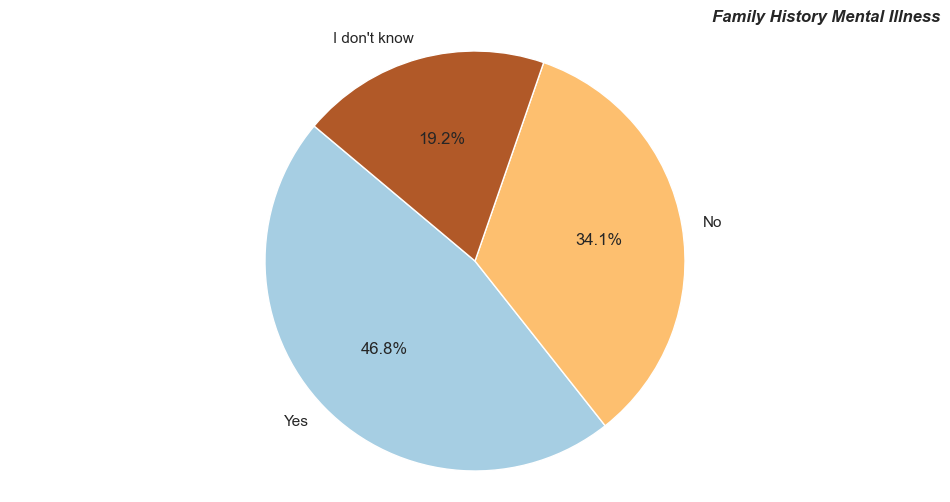

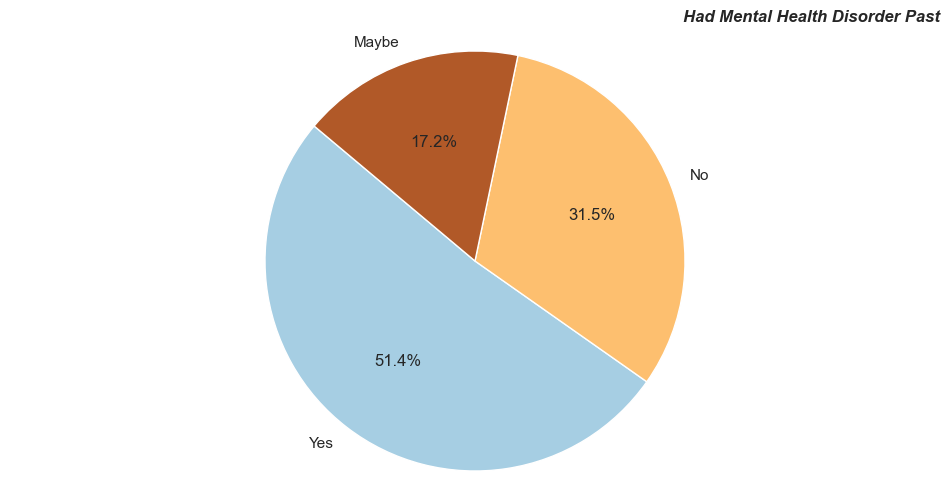

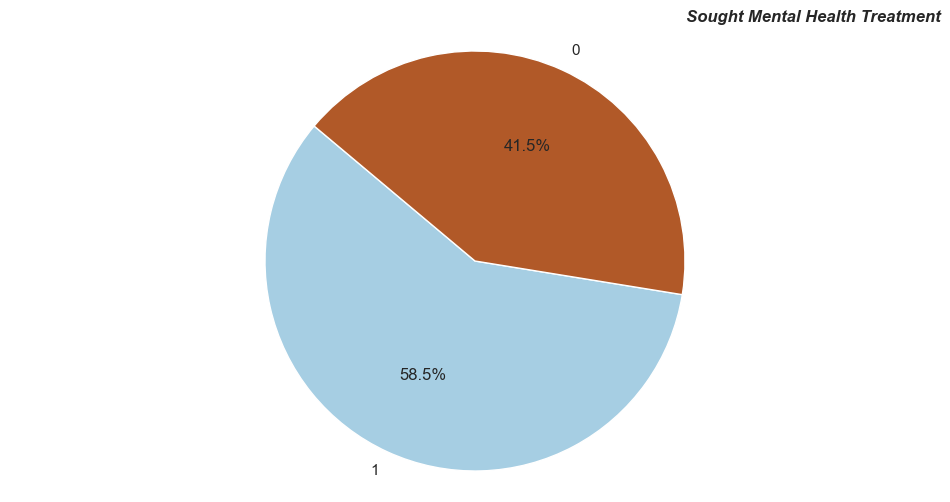

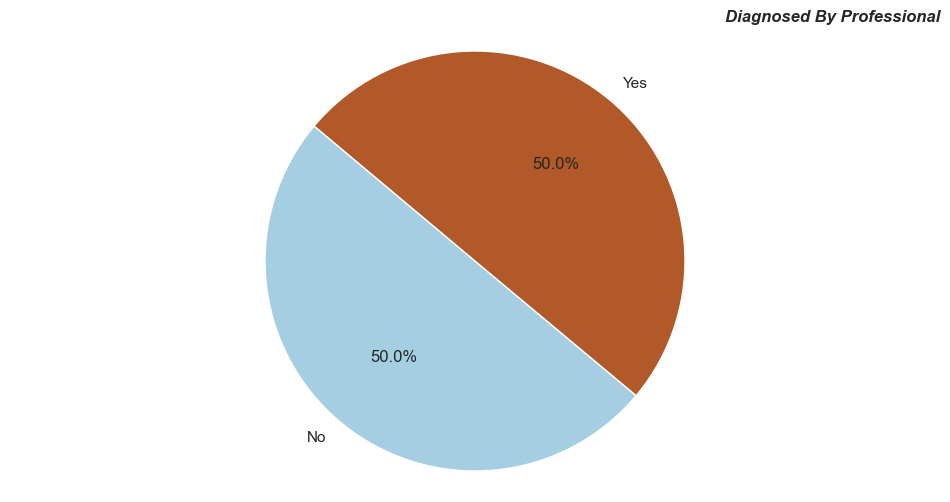

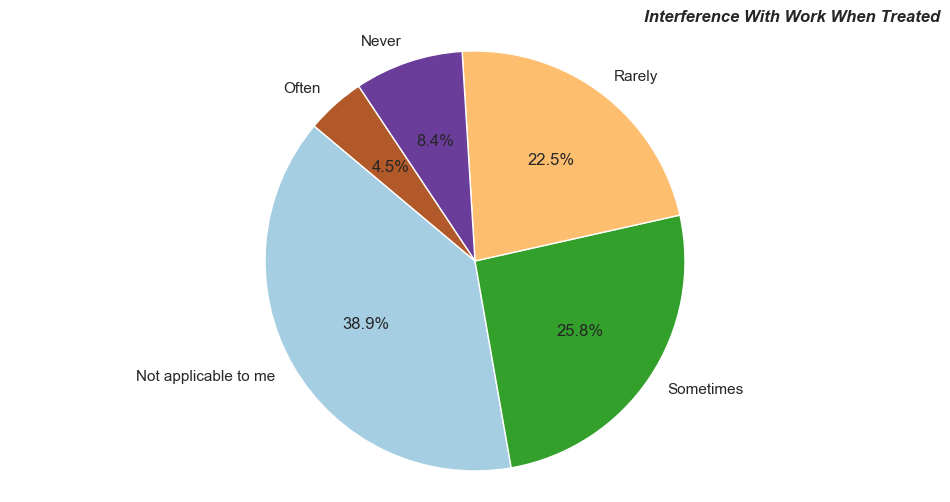

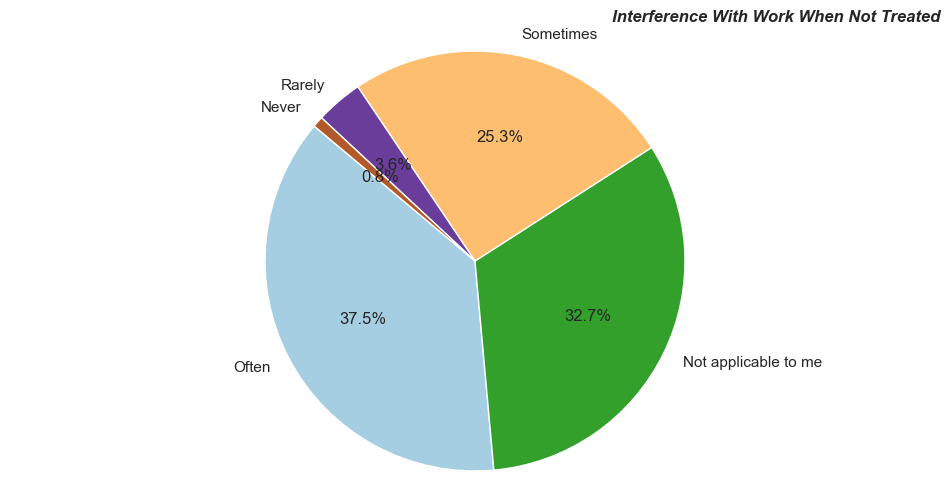

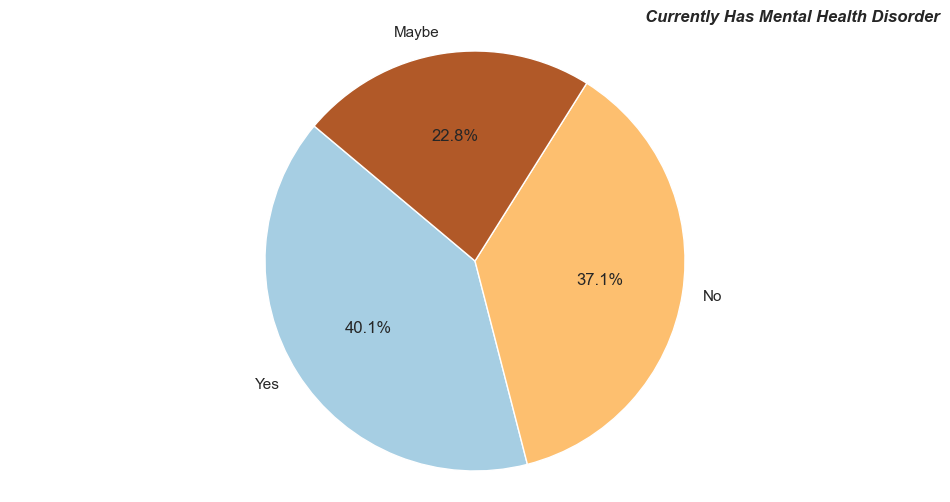

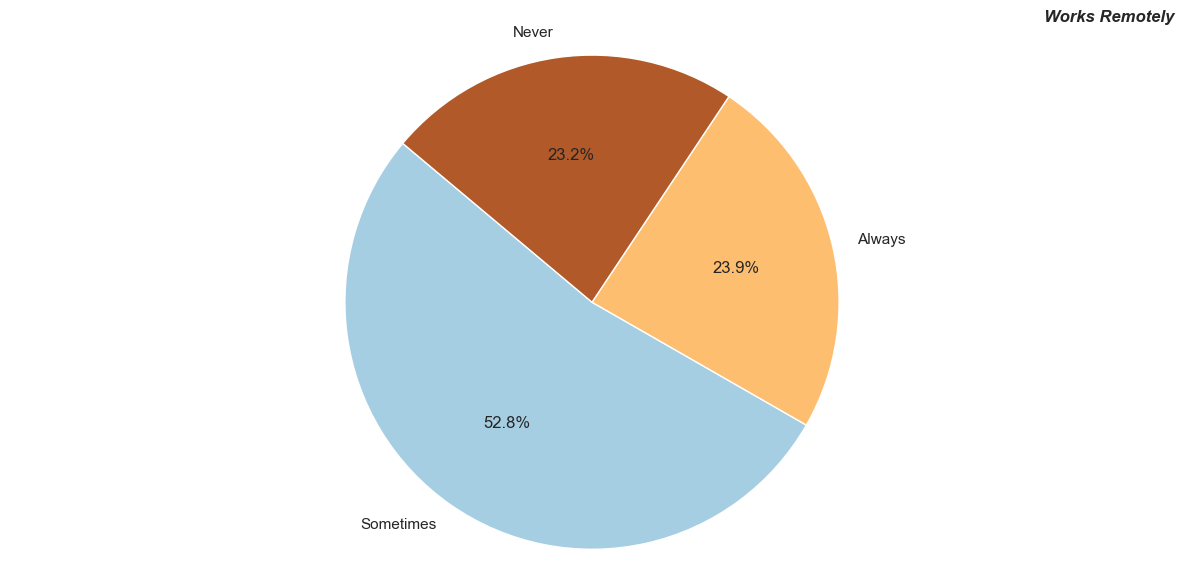

In [33]:
'''plot_variables = [
    'family_history_mental_illness', 'had_mental_health_disorder_past', 
    'sought_mental_health_treatment', 'diagnosed_by_professional', 
    'interference_with_work_when_treated', 'interference_with_work_when_not_treated', 
    'currently_has_mental_health_disorder', 'works_remotely', 
]

plt.figure(figsize=(20, 25))  # Width, Height in inches
sns.set(style="whitegrid")  # Style for better grid visibility


for index, variable in enumerate(plot_variables):
    plt.subplot(4, 2, index + 1)  
    ax = sns.countplot(data=df_global, x=variable, palette='viridis')
    ax.set_title(variable.replace("_", " ").title())
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate labels to avoid overlap

plt.tight_layout()  
plt.show()''' 


# Function to create pie chart for each variable
def plot_pie_chart(data, column):
    counts = data[column].value_counts()  # Count each category
    plt.figure(figsize=(12, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(np.linspace(0, 1, len(counts))))
    plt.title(column.replace("_", " ").title(),loc='right', style='italic', fontweight='bold', fontsize=12)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# List of variables for plotting
plot_variables = [
    'family_history_mental_illness', 'had_mental_health_disorder_past', 
    'sought_mental_health_treatment', 'diagnosed_by_professional', 
    'interference_with_work_when_treated', 'interference_with_work_when_not_treated', 
    'currently_has_mental_health_disorder', 'works_remotely', 
]

# Generate pie charts for each variable
for variable in plot_variables:
    plot_pie_chart(df_global, variable)

plt.tight_layout()  
plt.show()